# Titanic: Machine Learning from Disaster

## 1. 데이터 불러오기

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import warnings

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# 경고 메시지 무시
warnings.filterwarnings('ignore')

# 데이터 불러오기
df = pd.read_csv("data/titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# 원본 데이터 저장
df_raw = df.copy()

## 2. 데이터 확인

In [4]:
# 데이터 정보 확인
df.info()

# survived가 정답데이터

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


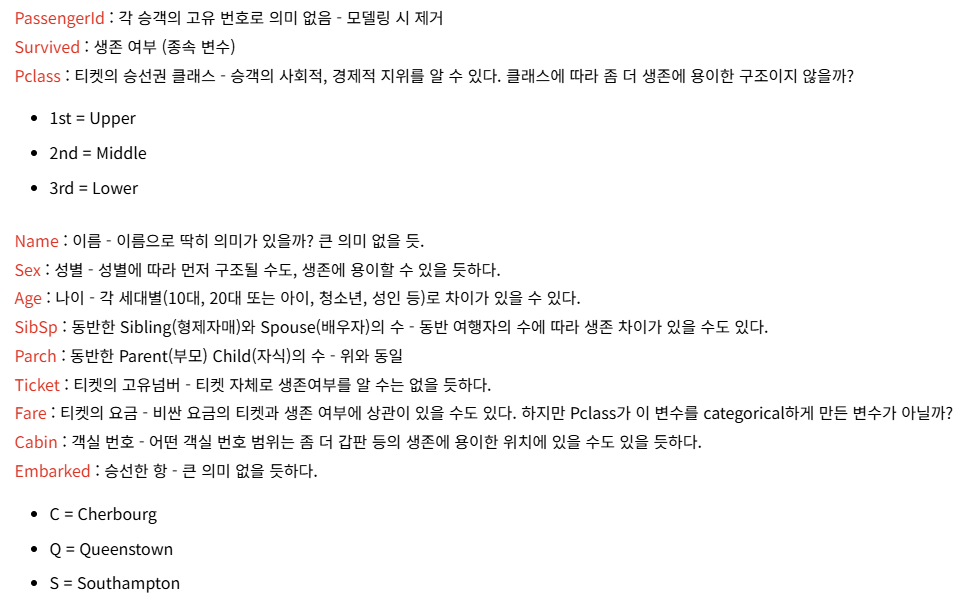

## 3. 결측치 처리

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df["Age"].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [7]:
df["Cabin"].unique()

# 해당 데이터를 확인 후, 선실의 구조도를 파악해봐야지
# 두개의 다른 종류의 데이터를 나눠 데이터를 보존해야지

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

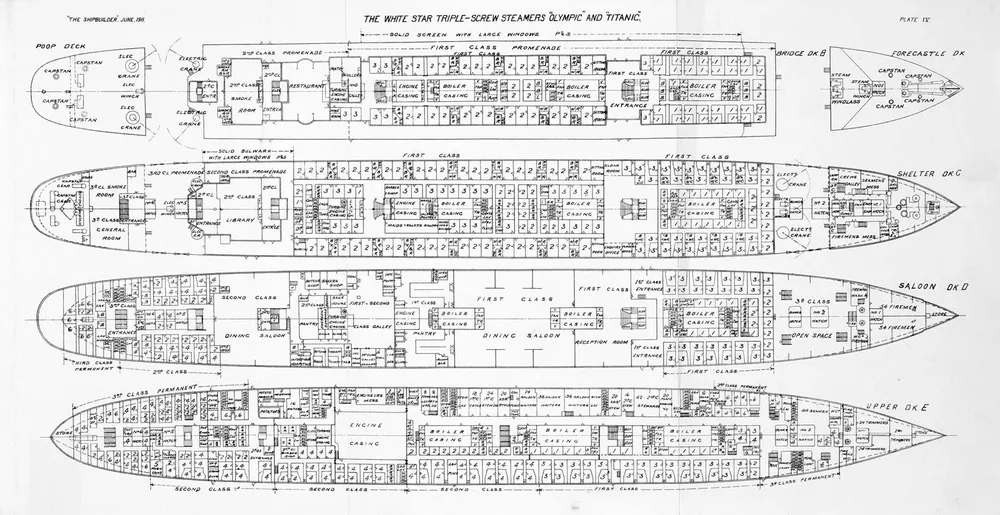

In [8]:
df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [9]:
# 나이는 평균값, Cabin은 'N'으로, Embarked는 'N'으로 대체
imputer = SimpleImputer(strategy='mean')
df['Age'] = imputer.fit_transform(df[['Age']])
df['Cabin'] = df['Cabin'].fillna('N')
df['Embarked'] = df['Embarked'].fillna('N')

In [10]:
# 결측치 대체되었는지 확인
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [11]:
# 필요없는 열들 제거
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,N,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,N,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,N,S


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    object 
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


## 4. 범주형데이터 벡터화

In [13]:
# # 1. LabelEncoder 객체 생성
# le_Sex = LabelEncoder()
# le_Embarked = LabelEncoder()

# # 2. 라벨 인코딩 적용
# df['Sex_encoded'] = le_Sex.fit_transform(df['Sex'])
# df['Embarked_encoded'] = le_Embarked.fit_transform(df['Embarked'])

# # 3. Cabin에 대해 One-Hot 인코딩 (get_dummies 사용!)
# cabin_encoded_df = pd.get_dummies(df['Cabin'])

# # 4. 원본 df에 결합
# df = pd.concat([df, cabin_encoded_df], axis=1)

# 원핫인코딩을 쓰면, 컬럼이 307개가 나왔어요!

In [14]:
from sklearn.preprocessing import LabelEncoder

features = ["Sex", "Embarked", "Cabin"]
for feature in features:
    le = LabelEncoder()
    df[feature + '_encoded'] = le.fit_transform(df[feature])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex_encoded,Embarked_encoded,Cabin_encoded
0,0,3,male,22.0,1,0,7.2500,N,S,1,3,146
1,1,1,female,38.0,1,0,71.2833,C85,C,0,0,81
2,1,3,female,26.0,0,0,7.9250,N,S,0,3,146
3,1,1,female,35.0,1,0,53.1000,C123,S,0,3,55
4,0,3,male,35.0,0,0,8.0500,N,S,1,3,146


In [15]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex_encoded,Embarked_encoded,Cabin_encoded
0,0,3,male,22.0,1,0,7.2500,N,S,1,3,146
1,1,1,female,38.0,1,0,71.2833,C85,C,0,0,81
2,1,3,female,26.0,0,0,7.9250,N,S,0,3,146
3,1,1,female,35.0,1,0,53.1000,C123,S,0,3,55
4,0,3,male,35.0,0,0,8.0500,N,S,1,3,146


In [16]:
# 데이터 통계 요약
df.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex_encoded,Embarked_encoded,Cabin_encoded
count,891.000000,891.000000,891,891.000000,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,148,4,NaN,NaN,NaN
top,NaN,NaN,male,NaN,NaN,NaN,NaN,N,S,NaN,NaN,NaN
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,687,644,NaN,NaN,NaN
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,0.647587,2.343434,129.974186
std,0.486592,0.836071,NaN,13.002015,1.102743,0.806057,49.693429,NaN,NaN,0.477990,1.167398,35.677211
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000
25%,0.000000,2.000000,NaN,22.000000,0.000000,0.000000,7.910400,NaN,NaN,0.000000,2.000000,146.000000
50%,0.000000,3.000000,NaN,29.699118,0.000000,0.000000,14.454200,NaN,NaN,1.000000,3.000000,146.000000
75%,1.000000,3.000000,NaN,35.000000,1.000000,0.000000,31.000000,NaN,NaN,1.000000,3.000000,146.000000


## 5. 이상치 처리

In [17]:
# 이상치 확인 => 통계요약
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_encoded,Embarked_encoded,Cabin_encoded
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587,2.343434,129.974186
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.477990,1.167398,35.677211
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,2.000000,146.000000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,1.000000,3.000000,146.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,3.000000,146.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,3.000000,147.000000


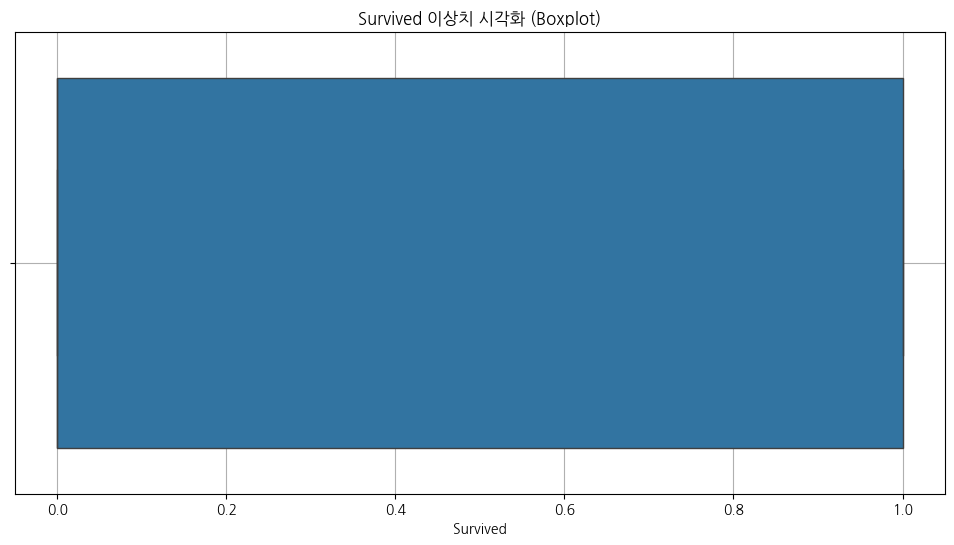

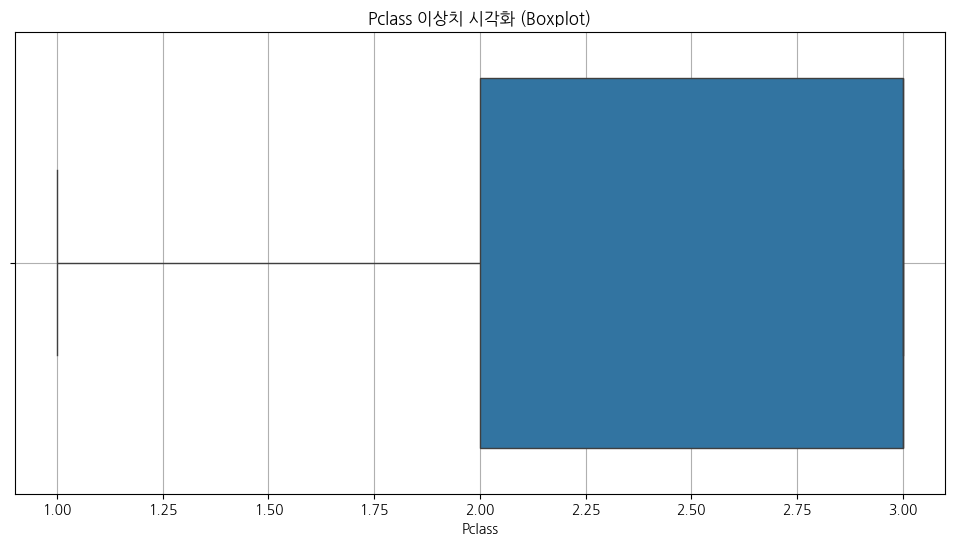

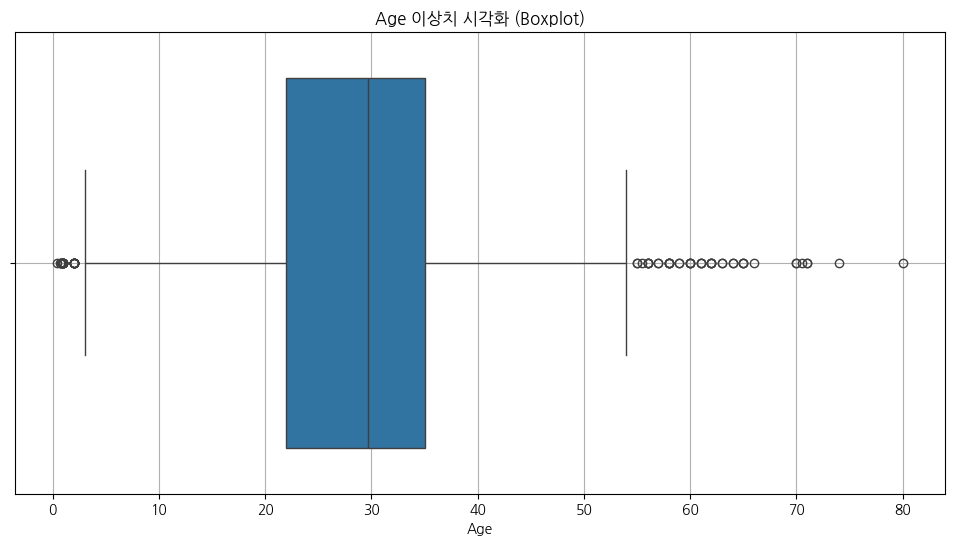

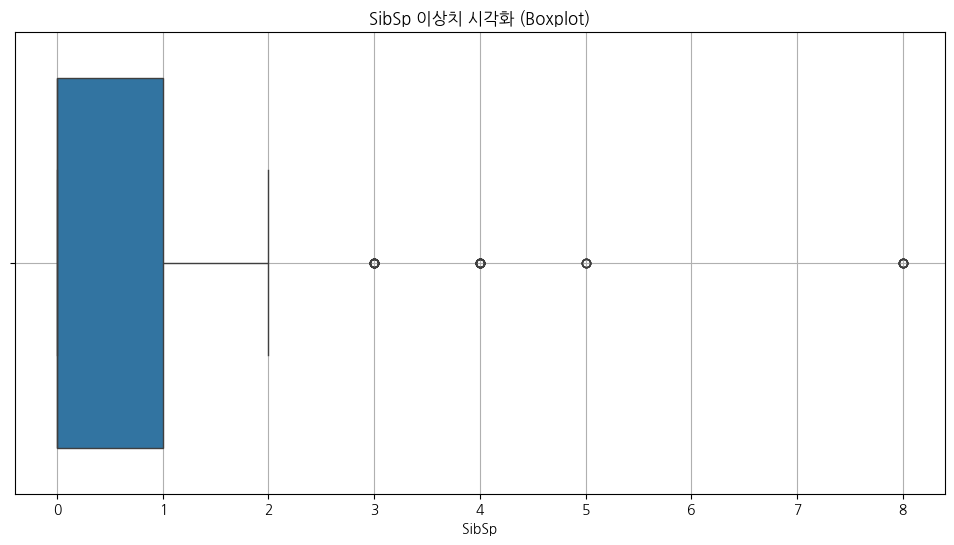

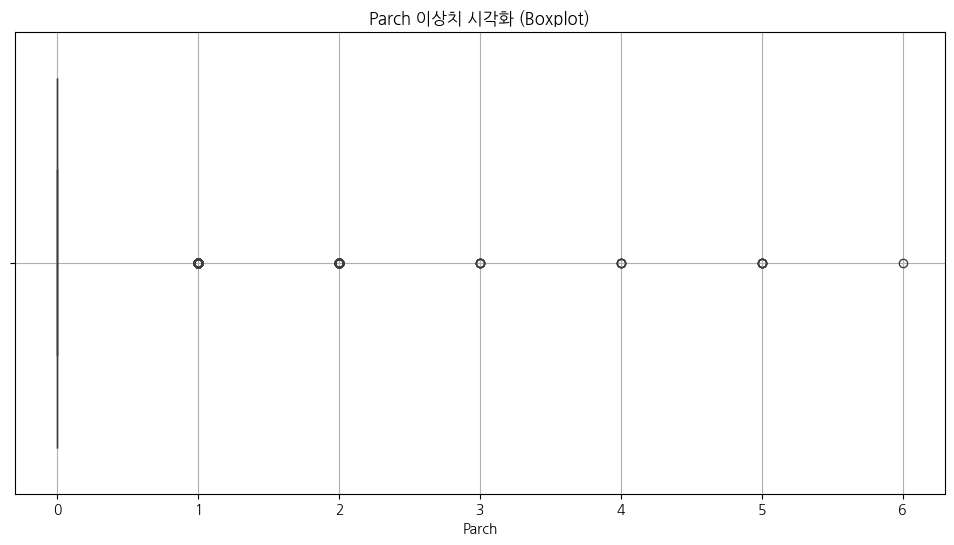

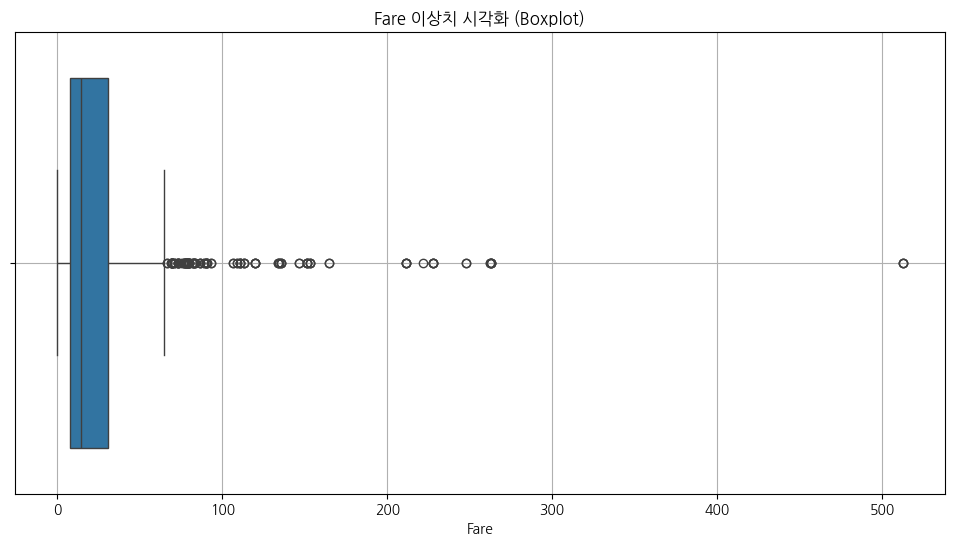

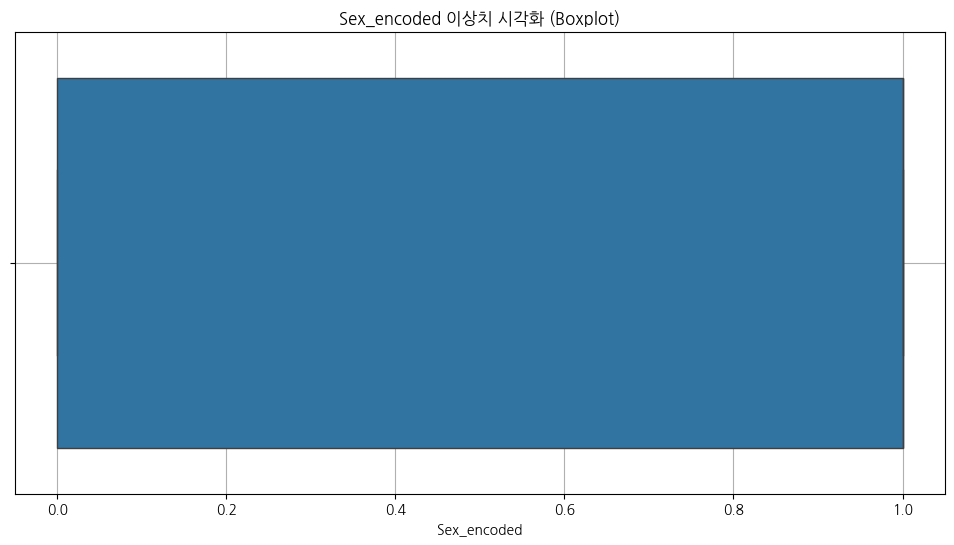

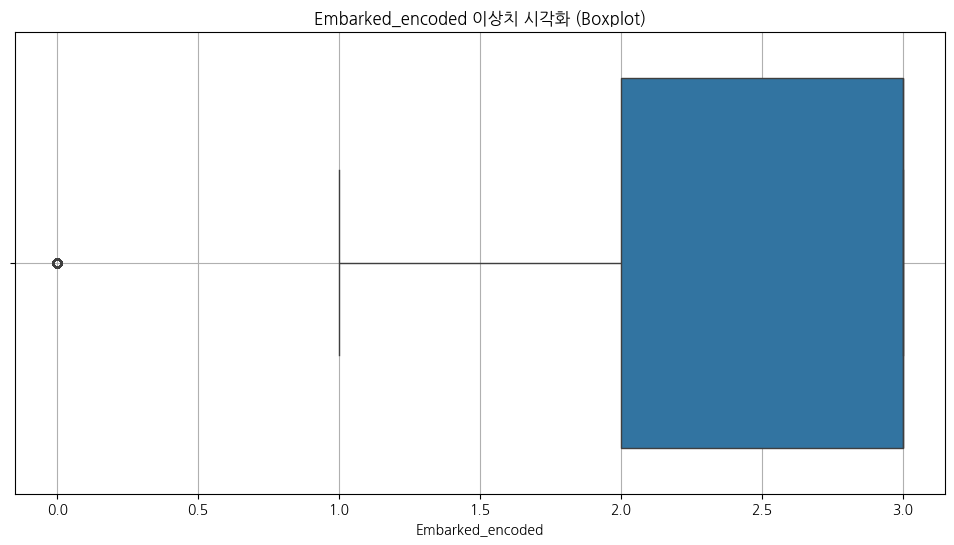

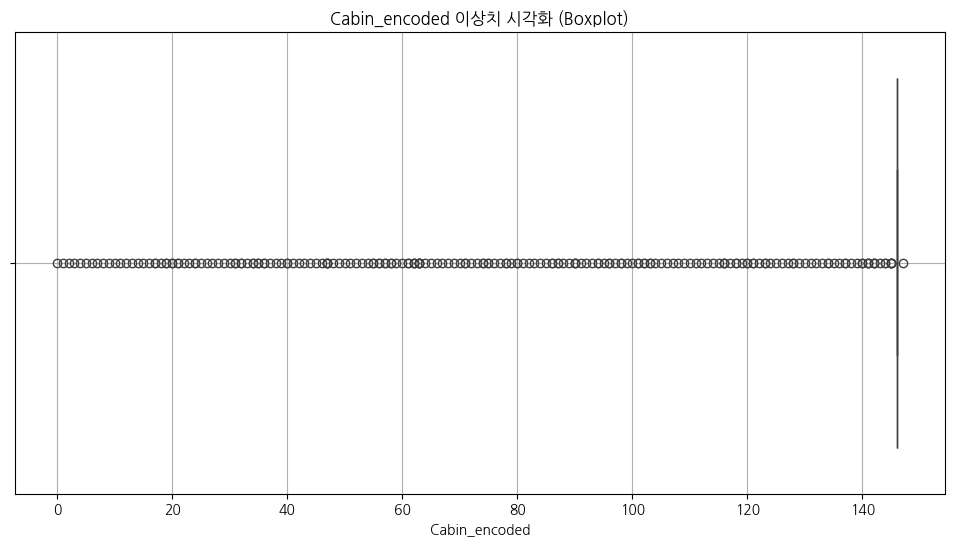

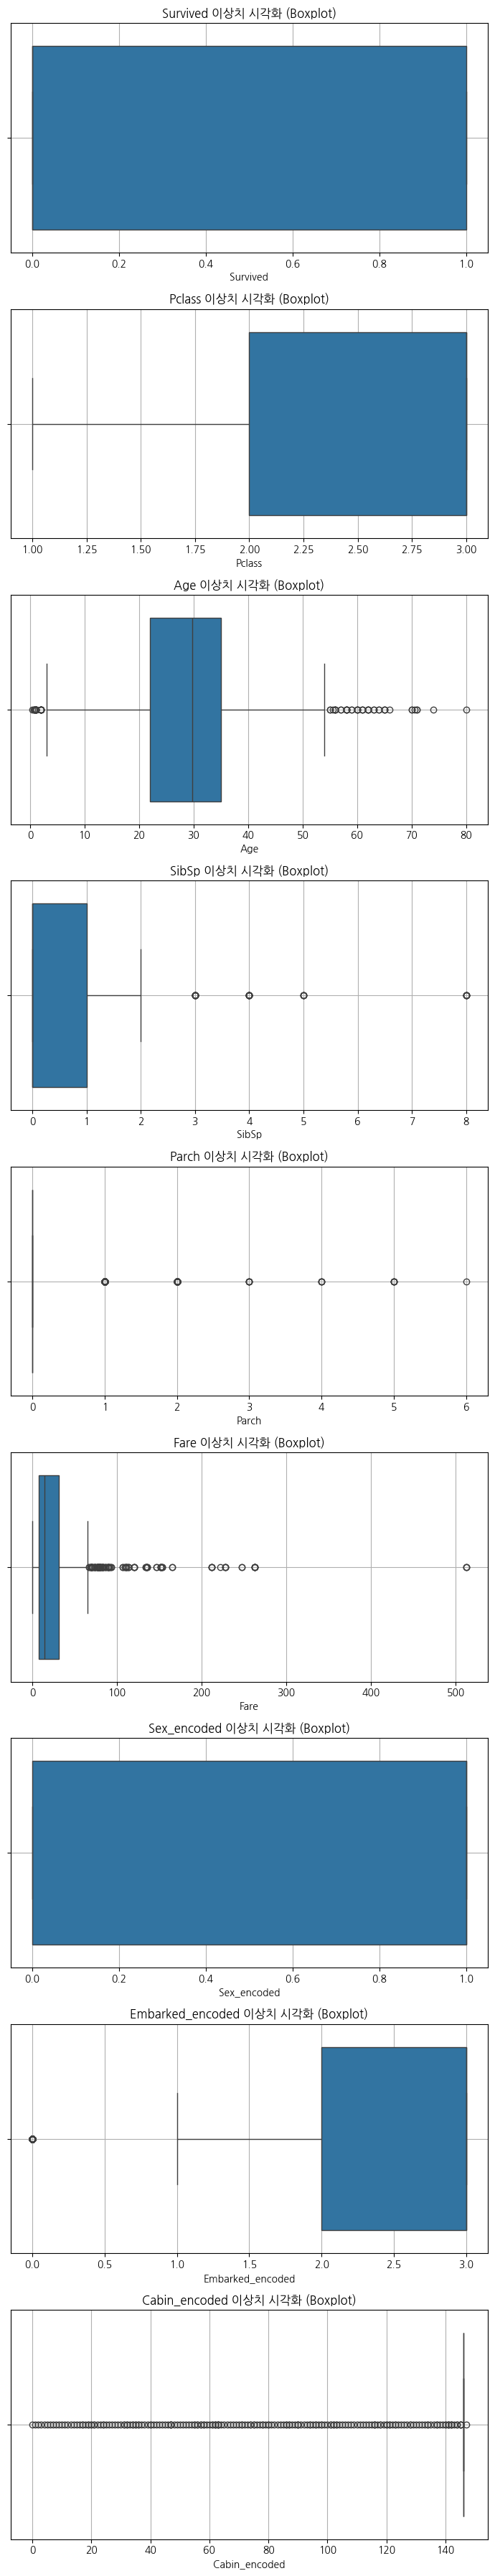

In [18]:
# 이상치 확인 => 시각화
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib  # 한글 깨짐 방지 (설치돼 있으면)

numeric_cols = [
    "Survived", "Pclass", "Age", "SibSp", "Parch",
    "Fare", "Sex_encoded", "Embarked_encoded", "Cabin_encoded"
]

# 시각화
for col in numeric_cols:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x=col)
    plt.title(f"{col} 이상치 시각화 (Boxplot)")
    plt.grid(True)
    plt.show()

fig, axes = plt.subplots(nrows=len(numeric_cols), figsize=(7, 4 * len(numeric_cols)))

for i, col in enumerate(numeric_cols):
    sns.boxplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f"{col} 이상치 시각화 (Boxplot)")
    axes[i].grid(True)

plt.tight_layout()
plt.show()

In [19]:
# 이상치 제거
def remove_outliers_iqr(df, columns):
    df_cleaned = df.copy()
    for col in columns:
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        # IQR 범위 내 값만 남기기
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower) & (df_cleaned[col] <= upper)]

    return df_cleaned

# 적용
df_no_outliers = remove_outliers_iqr(df, numeric_cols)
print(f"이상치 제거 전 데이터 크기: {df.shape}")
print(f"이상치 제거 후 데이터 크기: {df_no_outliers.shape}")

이상치 제거 전 데이터 크기: (891, 12)
이상치 제거 후 데이터 크기: (292, 12)


In [20]:
# 이상치 값 대체(Clipping) 방식
# def clip_outliers_iqr(df, columns):
#     df_clipped = df.copy()
#     for col in columns:
#         Q1 = df[col].quantile(0.25)
#         Q3 = df[col].quantile(0.75)
#         IQR = Q3 - Q1
#         lower = Q1 - 1.5 * IQR
#         upper = Q3 + 1.5 * IQR

#         # 이상치를 하한/상한값으로 클리핑
#         df_clipped[col] = df[col].clip(lower, upper)

#     return df_clipped

# # 적용
# df_clipped = clip_outliers_iqr(df, numeric_cols)

## 6. 데이터 분리

In [21]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex_encoded,Embarked_encoded,Cabin_encoded
0,0,3,male,22.0,1,0,7.2500,N,S,1,3,146
1,1,1,female,38.0,1,0,71.2833,C85,C,0,0,81
2,1,3,female,26.0,0,0,7.9250,N,S,0,3,146
3,1,1,female,35.0,1,0,53.1000,C123,S,0,3,55
4,0,3,male,35.0,0,0,8.0500,N,S,1,3,146


In [22]:
# 데이터 분리
X = df.drop('Survived', axis=1)
y = df['Survived']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
# stratify=y는 타겟 데이터(y)에 맞춰서 분할을 해야 한다.
# 회귀분석에서는 stratify를 사용하지 않지만, 분류에서는 반드시 사용해야 한다.
print("Train 데이터 크기:", X_train.shape)
print("Test 데이터 크기:", X_test.shape)
print("Train 타겟 크기:", y_train.shape)
print("Test 타겟 크기:", y_test.shape)
print("="*100)
print("Train 데이터 샘플:\n", X_train.head())
print("Test 데이터 샘플:\n", X_test.head())

# 분류데이터 분할 시, 정답 데이터(y)에 맞춰서 분할을 해야 한다.

Train 데이터 크기: (712, 11)
Test 데이터 크기: (179, 11)
Train 타겟 크기: (712,)
Test 타겟 크기: (179,)
Train 데이터 샘플:
      Pclass     Sex        Age  SibSp  Parch      Fare Cabin Embarked  \
692       3    male  29.699118      0      0   56.4958     N        S   
481       2    male  29.699118      0      0    0.0000     N        S   
527       1    male  29.699118      0      0  221.7792   C95        S   
855       3  female  18.000000      0      1    9.3500     N        S   
801       2  female  31.000000      1      1   26.2500     N        S   

     Sex_encoded  Embarked_encoded  Cabin_encoded  
692            1                 3            146  
481            1                 3            146  
527            1                 3             88  
855            0                 3            146  
801            0                 3            146  
Test 데이터 샘플:
      Pclass     Sex        Age  SibSp  Parch     Fare Cabin Embarked  \
565       3    male  24.000000      2      0  24.1500     N   

In [23]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# import matplotlib.pyplot as plt
# import seaborn as sns

# # 1. 범주형 수치화
# X_train_encoded = pd.get_dummies(X_train)
# X_test_encoded = pd.get_dummies(X_test)
# X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

# # 2. 모델 훈련
# dt_classifier = DecisionTreeClassifier(random_state=42)
# dt_classifier.fit(X_train_encoded, y_train)

# # 3. 예측
# y_pred = dt_classifier.predict(X_test_encoded)

# # 4. 평가
# accuracy = accuracy_score(y_test, y_pred)
# print(f"정확도: {accuracy:.2f}")

# print("분류 리포트:\n", classification_report(y_test, y_pred))

# cm = confusion_matrix(y_test, y_pred)
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
#             xticklabels=['Not Survived', 'Survived'],
#             yticklabels=['Not Survived', 'Survived'])
# plt.title("혼동 행렬")
# plt.xlabel("예측값")
# plt.ylabel("실제값")
# plt.show()

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

✅ Decision Tree 정확도: 0.73
✅ Random Forest 정확도: 0.82
✅ Logistic Regression 정확도: 0.82

📋 Decision Tree 분류 리포트:
               precision    recall  f1-score   support

           0       0.80      0.75      0.77       110
           1       0.64      0.71      0.67        69

    accuracy                           0.73       179
   macro avg       0.72      0.73      0.72       179
weighted avg       0.74      0.73      0.73       179

📋 Random Forest 분류 리포트:
               precision    recall  f1-score   support

           0       0.81      0.92      0.86       110
           1       0.84      0.67      0.74        69

    accuracy                           0.82       179
   macro avg       0.83      0.79      0.80       179
weighted avg       0.82      0.82      0.82       179

📋 Logistic Regression 분류 리포트:
               precision    recall  f1-score   support

           0       0.82      0.89      0.86       110
           1       0.80      0.70      0.74        69

    accuracy    

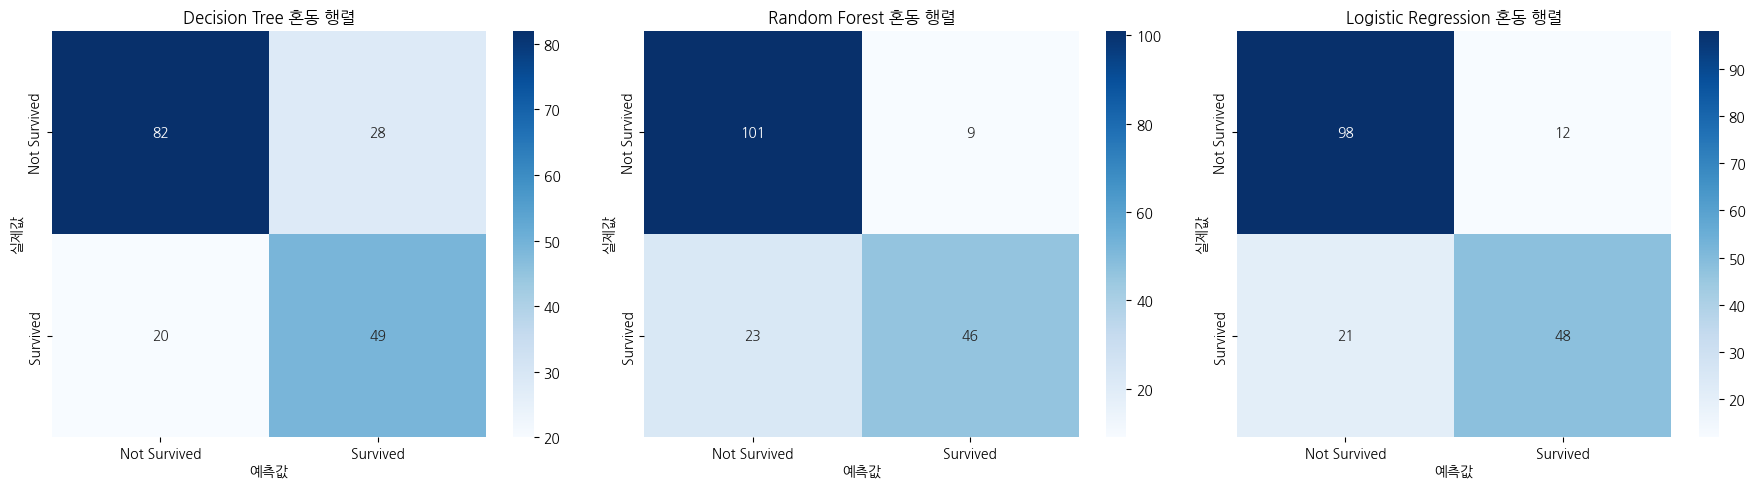

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

# 1. 문자형 컬럼 수치화 (get_dummies)
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# 2. train/test 간 열 맞추기 (중요!)
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

# 3. 모델 생성
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
lr_model = LogisticRegression(max_iter=1000, random_state=42)  # 로지스틱 회귀는 반복 설정 필요

# 4. 모델 학습
dt_model.fit(X_train_encoded, y_train)
rf_model.fit(X_train_encoded, y_train)
lr_model.fit(X_train_encoded, y_train)

# 5. 예측
dt_pred = dt_model.predict(X_test_encoded)
rf_pred = rf_model.predict(X_test_encoded)
lr_pred = lr_model.predict(X_test_encoded)

# 6. 정확도 평가
dt_accuracy = accuracy_score(y_test, dt_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
lr_accuracy = accuracy_score(y_test, lr_pred)

print(f"✅ Decision Tree 정확도: {dt_accuracy:.2f}")
print(f"✅ Random Forest 정확도: {rf_accuracy:.2f}")
print(f"✅ Logistic Regression 정확도: {lr_accuracy:.2f}\n")

# 7. 분류 리포트
print("📋 Decision Tree 분류 리포트:\n", classification_report(y_test, dt_pred))
print("📋 Random Forest 분류 리포트:\n", classification_report(y_test, rf_pred))
print("📋 Logistic Regression 분류 리포트:\n", classification_report(y_test, lr_pred))

# 8. 혼동 행렬 시각화 (3개 모델 한 번에)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

models = {
    "Decision Tree": dt_pred,
    "Random Forest": rf_pred,
    "Logistic Regression": lr_pred
}

for ax, (name, pred) in zip(axes, models.items()):
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=['Not Survived', 'Survived'],
                yticklabels=['Not Survived', 'Survived'])
    ax.set_title(f"{name} 혼동 행렬")
    ax.set_xlabel("예측값")
    ax.set_ylabel("실제값")

plt.tight_layout()
plt.show()